<a href="https://colab.research.google.com/github/Jhonnety/big_data/blob/main/PLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk  #libreria para procesamiento natural
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text = """
You know you need a fix when you fall down
You know you need to find a way
To get you through another day
Let me be the one to numb you out
Let me be the one to hold you
Never gonna let you get away
The shoulder you cry on
The dose that you die on
I, I can be your painkiller, killer, killer
You'll love me 'til it's all over, over
'Cause I'm the shoulder you cry on
The dose that you die on
I, I can be your painkiller, killer, killer
I know what you want so desperately
You know I'll give you one for free
Forever you're coming back to me
Now, I'm gonna give you what you need
'Cause I know what you fiend on and what you lean on
And what you lean on
The shoulder you cry on
The dose that you die on
I, I can be your painkiller, killer, killer
You'll love me 'til it's all over, over
'Cause I'm the shoulder you cry on
The dose that you die on
I, I can be your painkiller, killer, killer
Did you find another cure?
Did you find another cure?
I, I can be your painkiller, killer, killer
You'll love me 'til it's all over, over
'Cause I'm the shoulder you cry on
The dose that you die on
I, I can be your painkiller, killer, killer
Painkiller
"""

Vamos a tokenizar - lleva rl modelo a modo de vista

In [ ]:
from nltk.tokenize import word_tokenize
token = word_tokenize(text)
len(token)

275

Eliminar signos de puntuacion

In [ ]:
import string
token2 = []

for word in token: #para cada palabra/signo en la lista
  for letter in word: #para cada letra de cada palabra
    if letter in string.punctuation: #si es un signo de puntuacion, entra
      word = word.replace(letter, "") #reemplaza el signo por un espacio vacio
  token2.append(word)

len(token2)

275

Eliminar los espacios vacios

In [ ]:
token3 = []

for word in token2:
  if word != '':
    token3.append(word)

len(token3)

251

Pasar a minusculas

In [ ]:
token4 = []
for word in token3:
  token4.append(word.lower())
len(token4)

251

# Eliminar palabras con 1 y 2 caracteres

In [ ]:
token5 = []
for word in token4:
  if(len(word) > 2):
    token5.append(word)
len(token5)

180

# Stopwords

In [ ]:
from nltk.corpus import stopwords

nltk.download("stopwords")

stopwords_set = set(stopwords.words("english"))
#stopwords_set.add('like') example to add another stopword
stopwords_set

token6 = [word for word in token5 if word not in stopwords_set]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
len(token6)

94

# FreqDist para quitar las palabras repetidas

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(token6)
fdist

FreqDist({'killer': 12, 'painkiller': 7, 'know': 5, 'shoulder': 5, 'cry': 5, 'dose': 5, 'die': 5, 'cause': 4, 'need': 3, 'find': 3, ...})

Nube de palabras

In [ ]:
import wordcloud
from wordcloud import WordCloud

import matplotlib.pyplot as plt

text = " ".join(token6) # me devuelvo de lista a string

wordcloud = WordCloud(width=1000, height=100, background_color="white", min_font_size=8).generate(text)

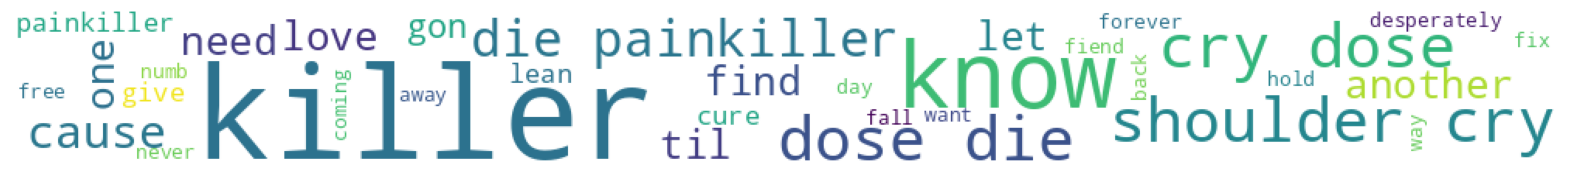

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
fdist.keys()

dict_keys(['know', 'need', 'fix', 'fall', 'find', 'way', 'get', 'another', 'day', 'let', 'one', 'numb', 'hold', 'never', 'gon', 'away', 'shoulder', 'cry', 'dose', 'die', 'painkiller', 'killer', 'love', 'til', 'cause', 'want', 'desperately', 'give', 'free', 'forever', 'coming', 'back', 'fiend', 'lean', 'cure'])

Consultar Bag of words y TF-IDF para hacer la ingenieria de caracteristicas a texto

In [ ]:
important_words = {}
for word, frecuency in fdist.items():
    if frecuency >= 5:
        important_words[word] = frecuency
important_words

{'know': 5,
 'shoulder': 5,
 'cry': 5,
 'dose': 5,
 'die': 5,
 'painkiller': 7,
 'killer': 12}

 # Bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ["Av. Las Patatas # 1234, Melipilla, 1234 Las Patatas killer killer killer killer Melipilla",
          "1234 Patatas 803 Block Depto 42 Melipilla, Las Patatas 1234 803 42 Block Melipilla",
          "Juan Soto 1234 Las Patatas cry 803 Block Depto 42 melipilla"]
keys = list(important_words.keys())
# Crear instancia del vectorizador de bolsa de palabras
vectorizador = CountVectorizer(vocabulary=keys)

# Obtener la matriz de características
matriz_caracteristicas = vectorizador.transform(corpus)

# Convertir la matriz a una lista de listas
matriz_caracteristicas = matriz_caracteristicas.toarray().tolist()

df = pd.DataFrame(matriz_caracteristicas, columns=keys)

print(df)

   know  shoulder  cry  dose  die  painkiller  killer
0     0         0    0     0    0           0       4
1     0         0    0     0    0           0       0
2     0         0    1     0    0           0       0


In [ ]:
new_list = vectorizador.transform(["cause I am your shoulder where you can cry", "hola soy homero chino"])
# Convertir la matriz a una lista de listas
new_list = new_list.toarray().tolist()
new_list

[[0, 1, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]

In [ ]:
nuevo_df = pd.DataFrame(new_list, columns=keys)
df = pd.concat([df, nuevo_df], ignore_index=True)
df

,know,shoulder,cry,dose,die,painkiller,killer
0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0


# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Corpus de documentos de ejemplo
corpus = ["killer im the killer","I am the shoulder where you cry on", "i donk know"]


# Crear un vectorizador TF-IDF que solo considere las palabras clave
vectorizador = TfidfVectorizer(vocabulary=keys)

# Ajustar el vectorizador al corpus de documentos
vectorizador.fit(corpus)

# Obtener la matriz TF-IDF solo para las palabras clave
matriz_tfidf = vectorizador.transform(corpus)

# Convertir la matriz TF-IDF a un DataFrame (opcional)
import pandas as pd
df_tfidf = pd.DataFrame(matriz_tfidf.toarray(), columns=vectorizador.get_feature_names_out())

# Mostrar la matriz TF-IDF o el DataFrame
print(df_tfidf)

   know  shoulder       cry  dose  die  painkiller  killer
0   0.0  0.000000  0.000000   0.0  0.0         0.0     1.0
1   0.0  0.707107  0.707107   0.0  0.0         0.0     0.0
2   1.0  0.000000  0.000000   0.0  0.0         0.0     0.0
